In [15]:
from yellowbrick.classifier import ProbabilityCalibrationCurve
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
import os
import pandas as pd

In [21]:
from sklearn.model_selection import train_test_split

In [16]:
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=2)

train_samples = 100  # Samples used for training the models

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

FIXTURES  = 'E:\data'

## Dataset loading mechanisms
datasets = {
    "bikeshare": os.path.join(FIXTURES, "bikeshare", "bikeshare.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "energy": os.path.join(FIXTURES, "energy", "energy.csv"),
    "game": os.path.join(FIXTURES, "game", "game.csv"),
    "mushroom": os.path.join(FIXTURES, "mushroom", "mushroom.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
    "spam": os.path.join(FIXTURES, "spam", "spam.csv"),
}

In [17]:
def load_data(name, download=False):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files.
    """

    # Get the path from the datasets
    path = datasets[name]

    # Check if the data exists, otherwise download or raise
    if not os.path.exists(path):
        if download:
            download_all()
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))


    # Return the data frame
    return pd.read_csv(path)

In [19]:
df = load_data('occupancy')
df.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [22]:
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = df[features].as_matrix()
y = df.occupancy.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

c:\users\saurab~1\desktop\yellow~1\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
c:\users\saurab~1\desktop\yellow~1\venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [23]:
viz = ProbabilityCalibrationCurve(GaussianNB())


ProbabilityCalibrationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001893F0F3390>,
              model=None)

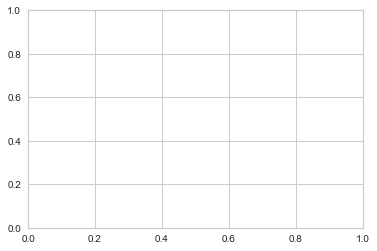

In [24]:
viz.fit(X_train, y_train)

	Brier: 0.031


0.031114565567486575

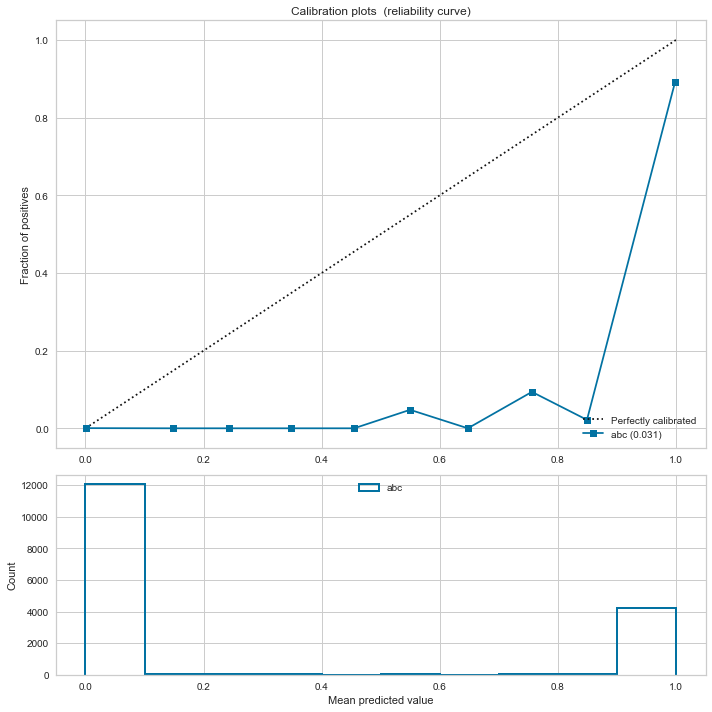

In [25]:
viz.score(X_train, y_train)